In [1]:

import pickle
with open("./cifar-100-python/test", 'rb') as fo:
     test = pickle.load(fo, encoding='bytes')
with open("./cifar-100-python/meta", 'rb') as fo:
    meta = pickle.load(fo, encoding='bytes')
with open("./cifar-100-python/train", 'rb') as fo:
    train = pickle.load(fo, encoding='bytes')


FileNotFoundError: [Errno 2] No such file or directory: './cifar-100-python/test'

In [23]:
# decoding data to be more user friendly 
decoded_test = {key.decode("utf-8"): value for key, value in test.items()}
decoded_test['filenames'] = [filename.decode('utf-8') for filename in decoded_test['filenames']]

decoded_train = {key.decode("utf-8"): value for key, value in train.items()}
decoded_train['filenames'] = [filename.decode('utf-8') for filename in decoded_train['filenames']]

decoded_meta = {key.decode("utf-8"): value for key, value in meta.items()}
decoded_meta['fine_label_names'] = [filename.decode('utf-8') for filename in decoded_meta['fine_label_names']]



In [48]:
print(decoded_test.keys(), decoded_train.keys(), '\n',  decoded_meta.keys())
print(decoded_meta.get("fine_label_names").index("motorcycle"))
print(decoded_meta.get("coarse_label_names"))


dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data']) dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data']) 
 dict_keys(['fine_label_names', 'coarse_label_names'])
48
[b'aquatic_mammals', b'fish', b'flowers', b'food_containers', b'fruit_and_vegetables', b'household_electrical_devices', b'household_furniture', b'insects', b'large_carnivores', b'large_man-made_outdoor_things', b'large_natural_outdoor_scenes', b'large_omnivores_and_herbivores', b'medium_mammals', b'non-insect_invertebrates', b'people', b'reptiles', b'small_mammals', b'trees', b'vehicles_1', b'vehicles_2']


In [5]:
decoded_train.get("filenames")[0], decoded_train.get("batch_label")[0], decoded_train.get("fine_labels")[0], decoded_train.get("coarse_labels")[0], decoded_train.get("data")[0]

('bos_taurus_s_000507.png',
 116,
 19,
 11,
 array([255, 255, 255, ...,  10,  59,  79], dtype=uint8))

In [47]:
import cv2
# Reshape the array if it's an image
img = decoded_train.get("data")[81].reshape(32, 32, 3)

scale_factor = 10 # scale it up by 10 just to viusalize it 
resized_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)


# Display the image using OpenCV
cv2.imshow('Image', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



In [3]:
train_labels

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [4]:
motorcycle_class = 48
car_class = 81

# if the label is a car it is 1, if the label is motorcycle it gets 2, if neither it is 0
for index, label in enumerate(train_labels):
    if label !=  motorcycle_class and label != car_class:
        train_labels[index] = 0
    elif label == car_class:
         train_labels[index] = 1
    elif label == motorcycle_class:
         train_labels[index] = 2


In [6]:
for index, label in enumerate(test_labels):
    if label !=  motorcycle_class and label != car_class:
        test_labels[index] = 0
    elif label == car_class:
         test_labels[index] = 1
    elif label == motorcycle_class:
         test_labels[index] = 2

In [5]:
for x in train_labels:
    if x == True:
        print(x)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [8]:


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Two classes: "motorcycle or car" and "neither"
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),  # You can adjust the learning rate and other hyperparameters
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1281 - accuracy: 0.9782 - val_loss: 0.1142 - val_accuracy: 0.9800
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1134 - accuracy: 0.9800 - val_loss: 0.1109 - val_accuracy: 0.9800
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1103 - accuracy: 0.9800 - val_loss: 0.1094 - val_accuracy: 0.9800
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1071 - accuracy: 0.9800 - val_loss: 0.1039 - val_accuracy: 0.9800
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1023 - accuracy: 0.9800 - val_loss: 0.0972 - val_accuracy: 0.9800
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0988 - accuracy: 0.9800 - val_loss: 0.0926 - val_accuracy: 0.9800
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0962 - accuracy: 0.9800 - val_loss: 0.0902 -

In [18]:
import cv2
import numpy as np
image_path = "./valid.jpg"
input_size = (32, 32)  # Adjust this to the input size expected by your previous model

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image = cv2.resize(image, input_size)  # Resize to match the model's input size
image = image / 255.0  # Normalize pixel values (if needed)
image = np.expand_dims(image, axis=0)  # Add a batch dimension

In [21]:
# Make predictions
predictions = model.predict(image)

# Assuming the model has three classes: "neither," "car," and "motorcycle"
class_labels = ["neither", "car", "motorcycle"]

# Extract the class with the highest probability (argmax)
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")

1/1 [==============================] - 0s 22ms/step
Predicted Class: neither


In [9]:
import tensorflow_hub as hub

# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [10]:
from tensorflow.keras import layers

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar100

# Load the ResNet-50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Three classes: "neither," "car," and "motorcycle"

# Create the custom model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

94765736/94765736 [==============================] - 17s 0us/step


Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 0.7620 - accuracy: 0.9768 - val_loss: 0.1085 - val_accuracy: 0.9800
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.1164 - accuracy: 0.9800 - val_loss: 0.1079 - val_accuracy: 0.9800
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.1171 - accuracy: 0.9800 - val_loss: 0.1075 - val_accuracy: 0.9800
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.1122 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9800
Epoch 5/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.1124 - accuracy: 0.9800

KeyboardInterrupt: 

In [1]:
# change images name to random

import os
import random
import string

def random_string(length):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

def rename_files_in_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return

    for filename in os.listdir(folder_path):
        old_file_path = os.path.join(folder_path, filename)

        if os.path.isfile(old_file_path):
            file_extension = os.path.splitext(filename)[1]
            new_filename = random_string(10) + file_extension
            new_file_path = os.path.join(folder_path, new_filename)

            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {filename} -> {new_filename}")

if __name__ == "__main__":
    folder_path = "./random_dataset_1/Dataset/Truck/"  # Replace with the path to your folder
    rename_files_in_folder(folder_path)


Renamed: Image_1.jpg -> lltehmqwpc.jpg
Renamed: Image_10.jpg -> okavjnszfk.jpg
Renamed: Image_100.jpg -> mzfpbnvdxw.jpg
Renamed: Image_11.jpg -> jkarrjeucj.jpg
Renamed: Image_12.jpg -> ftvoizoklf.jpg
Renamed: Image_13.JPG -> jdebdkhxvl.JPG
Renamed: Image_14.jpg -> cmflbyjyzy.jpg
Renamed: Image_15.jpg -> lhjiuaoavh.jpg
Renamed: Image_16.jpg -> jmqwvwlbfs.jpg
Renamed: Image_17.jpg -> vhqzzwjcfm.jpg
Renamed: Image_18.jpg -> hjdngqlosw.jpg
Renamed: Image_19.jpg -> gcbchdznfe.jpg
Renamed: Image_2.jpg -> ewijecklau.jpg
Renamed: Image_20.jpg -> irqofluxur.jpg
Renamed: Image_21.jpg -> dqzxusmcrz.jpg
Renamed: Image_22.jpg -> rkwuvgouna.jpg
Renamed: Image_23.jpg -> ihwbjcomig.jpg
Renamed: Image_24.jpg -> xiaajphsja.jpg
Renamed: Image_25.jpg -> siwkcrxpbh.jpg
Renamed: Image_26.jpg -> hwpnhkqcik.jpg
Renamed: Image_27.jpg -> sgtpkopzor.jpg
Renamed: Image_28.jpg -> xdyjeceeal.jpg
Renamed: Image_29.JPG -> eauuiyabth.JPG
Renamed: Image_3.jpg -> udxvteogqt.jpg
Renamed: Image_30.jpg -> tjodrjyplc.jpg
Re

In [3]:
import tensorflow as tf
tf.version.VERSION
tf.config.list_physical_devices('GPU')


'2.12.0'

### new created dataset model

In [4]:
import os

# Ścieżki do folderów z danymi
bikes_dir = './whole_dataset/bikes/'
cars_dir = './whole_dataset/cars/'
random_dir = './whole_dataset/random/'

# Tworzenie listy zdjęć w folderach
bike_images = [os.path.join(bikes_dir, img) for img in os.listdir(bikes_dir) if img.endswith('.jpg')]
cars_images = [os.path.join(cars_dir, img) for img in os.listdir(cars_dir) if img.endswith('.jpg')]
random_images = [os.path.join(random_dir, img) for img in os.listdir(random_dir) if img.endswith('.jpg')]

# Tworzenie etykiet na podstawie folderów
bike_labels = [1] * len(bike_images)  # Etykieta 1 oznacza "motocykl"
cars_labels = [2] * len(cars_images)  # Etykieta 2 oznacza "auto"
random_labels = [0] * len(random_images)  # Etykieta 0 oznacza "brak auta i motocykla"

# Połączenie list zdjęć i etykiet
images = bike_images + cars_images + random_images
labels = bike_labels + cars_labels + random_labels


In [9]:
from sklearn.model_selection import train_test_split

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [3]:
# cut 20% of files and paste them into test directory (becuase now train and test images are in the same directory)

import os
import shutil
import random

def move_random_files_to_test_directory(source_dir, test_dir, percentage=20):
    # Create the "test" directory if it doesn't exist
    os.makedirs(test_dir, exist_ok=True)

    # List all files in the source directory
    file_list = os.listdir(source_dir)
    
    # Calculate the number of files to move
    num_files_to_move = min(int(len(file_list) * percentage / 100), len(file_list))
    
    # Randomly select unique files to move
    files_to_move = random.sample(file_list, num_files_to_move)
    
    # Move selected files to the "test" directory
    for filename in files_to_move:
        source_file = os.path.join(source_dir, filename)
        test_file = os.path.join(test_dir, filename)
        
        if os.path.exists(source_file):
            shutil.move(source_file, test_file)
            print(f"Moved: {source_file} -> {test_file}")

if __name__ == "__main__":
    source_directory = './whole_dataset/random/' 
    test_directory = './whole_dataset/test/'  

    move_random_files_to_test_directory(source_directory, test_directory)




Moved: ./whole_dataset/random/00000077_(2).jpg -> ./whole_dataset/test/00000077_(2).jpg
Moved: ./whole_dataset/random/uloniwutxy.jpg -> ./whole_dataset/test/uloniwutxy.jpg
Moved: ./whole_dataset/random/00000017_(7).jpg -> ./whole_dataset/test/00000017_(7).jpg
Moved: ./whole_dataset/random/2877.jpg -> ./whole_dataset/test/2877.jpg
Moved: ./whole_dataset/random/00000771_(3).jpg -> ./whole_dataset/test/00000771_(3).jpg
Moved: ./whole_dataset/random/n03792782_13735.jpg -> ./whole_dataset/test/n03792782_13735.jpg
Moved: ./whole_dataset/random/121333607.jpg -> ./whole_dataset/test/121333607.jpg
Moved: ./whole_dataset/random/128479514.jpg -> ./whole_dataset/test/128479514.jpg
Moved: ./whole_dataset/random/3692.jpg -> ./whole_dataset/test/3692.jpg
Moved: ./whole_dataset/random/00000398_(5).jpg -> ./whole_dataset/test/00000398_(5).jpg
Moved: ./whole_dataset/random/2015_00083.jpg -> ./whole_dataset/test/2015_00083.jpg
Moved: ./whole_dataset/random/8740.jpg -> ./whole_dataset/test/8740.jpg
Moved:

In [26]:
from PIL import Image

# Function to convert images to RGBA format
def convert_to_rgba(image_path):
    img = Image.open(image_path)
    if img.mode != 'RGBA':
        img = img.convert('RGBA')
    return img

# Example of how to convert all images in a directory
data_directory = './whole_dataset/train_data/random/'
for image_filename in os.listdir(data_directory):
    if image_filename.endswith('.png'):
        image_path = os.path.join(data_directory, image_filename)
        rgba_image = convert_to_rgba(image_path)
        rgba_image.save(image_path)


In [1]:
TRAIN_DATA_PATH = "D:/data/train_data/"
TEST_DATA_PATH = "D:/data/test_data/"

In [67]:
import os

def remove_path_prefixes(directory_path):
    for root, _, files in os.walk(directory_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            if file_path.startswith('\\\\?\\'):
                new_path = os.path.relpath(file_path, directory_path)
                os.rename(file_path, new_path)
                print(f'Renamed: {file_path} -> {new_path}')


remove_path_prefixes(TRAIN_DATA_PATH)
remove_path_prefixes(TEST_DATA_PATH)


In [3]:
# preprocess data - rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1/255.) # max pixel value 255

IMG_SIZE = (224, 224)

# turn data from directories into batches of 32
train_data = data_generator.flow_from_directory(TRAIN_DATA_PATH, 
                                                batch_size=32, target_size=IMG_SIZE, 
                                                class_mode="categorical")

test_data = data_generator.flow_from_directory(TEST_DATA_PATH, 
                                               batch_size=32, target_size=IMG_SIZE, 
                                               class_mode="categorical")



Found 13612 images belonging to 2 classes.
Found 3436 images belonging to 2 classes.


In [8]:
# create a baseline model (implemented CNN from cnn explainer https://poloclub.github.io/cnn-explainer/)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

two_classes_model = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(2, activation="softmax")
])

# compile the model
two_classes_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])


In [86]:
import cv2
import os

data_dir = 'D:/data/'

def is_corrupted_image(file_path):
    try:
        img = cv2.imread(file_path)
        return img is None
    except Exception as e:
        return True

corrupted_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if is_corrupted_image(file_path):
            corrupted_files.append(file_path)

if corrupted_files:
    print(f"Corrupted files found: {corrupted_files}")
else:
    print("No corrupted files detected.")


No corrupted files detected.


In [116]:
import cv2
import os

data_dir = 'D:/data/'

def is_corrupted_image(file_path):
    try:
        img = Image.open(file_path).load()
        return img is None
    except OSError as e:
        return True

corrupted_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if is_corrupted_image(file_path):
            corrupted_files.append(file_path)

if corrupted_files:
    print(f"Corrupted files found: {corrupted_files}")
else:
    print("No corrupted files detected.")

No corrupted files detected.


In [94]:
import os

def find_files_with_different_formats(directory_path):
    different_format_files = []
    
    for root, _, files in os.walk(directory_path):
        for file in files:
            file_format = file.split('.')[-1].lower()
            if file_format != 'jpg':
                file_path = os.path.join(root, file)
                different_format_files.append(file_path)
    
    return different_format_files


different_format_files = find_files_with_different_formats(data_dir)

for file_path in different_format_files:
    print(file_path)


In [91]:
from PIL import Image
import os

def convert_images_to_jpg(directory_path):
    for root, _, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            if file_path.lower().endswith(('.png', '.jpeg', '.gif')):
                im = Image.open(file_path)
                
                # Convert the image to RGB mode
                im = im.convert("RGB")
                
                jpg_path = os.path.splitext(file_path)[0] + ".jpg"
                im.save(jpg_path, "JPEG")
                os.remove(file_path)


# Convert images to .jpg format
convert_images_to_jpg(data_dir)


In [82]:
for file_path in corrupted_files:
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except OSError as e:
        print(f"Error deleting {file_path}: {e}")

print("Deletion process complete.")

Deleted: D:/data/test_data\bike\24_kawasaki_vulcan_s_abs_2016_moto_saigon_3_1568719119960_7778.gif
Deleted: D:/data/test_data\bike\29_pic_001_1568719608045_14577.gif
Deleted: D:/data/test_data\random\chinese-youngster-giant-mountain-bike-shanghai-china-dec-worldâ€™s-largest-manufacturer-revenue-factories-90906564.jpg
Deleted: D:/data/test_data\random\mayor-chino-en-una-bici-oxidada-pekín-china-92011312.jpg
Deleted: D:/data/train_data\bike\19_r_636858959614681208_4528_kkk_1568719429934_12092.gif
Deleted: D:/data/train_data\bike\201908281252SAche biển số xe 11.jpg
Deleted: D:/data/train_data\bike\201908281252SAche biển số xe 9.jpg
Deleted: D:/data/train_data\bike\55_gia_xe_81_2_1568719088201_7338.gif
Deleted: D:/data/train_data\bike\65_51ew43mofl9ef_1568719232558_9326.gif
Deleted: D:/data/train_data\bike\69_xedoisong_Yamaha_MT_03_do_1_MEGC_1568719472292_12693.gif
Deleted: D:/data/train_data\bike\Valerio-vespa-xanh_cửu_đuôi.jpg
Deleted: D:/data/train_data\bike\ảnh-1024x640.jpg
Deleted: D:

In [93]:
import os

def remove_webp_files(directory_path):
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith('.webp'):
                file_path = os.path.join(root, file)
                os.remove(file_path)


# Remove .webp files from the specified directory
remove_webp_files(data_dir)


In [99]:
from PIL import Image
import os

def convert_images_to_rgb(directory_path):
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith('.jpg'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                if img.mode != "RGB":
                    img = img.convert("RGB")
                    img.save(file_path)

convert_images_to_rgb(data_dir)


In [6]:
import tensorflow as tf
import os


# List of supported image file extensions
supported_extensions = (".jpg", ".jpeg", ".png", ".gif")

# Function to check if a file is a supported image
def is_supported_image(filename):
    return filename.lower().endswith(supported_extensions)

# Function to process image files in a directory
def process_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            if is_supported_image(filename):
                image_file = os.path.join(root, filename)
                try:
                    # Open and read the image file
                    with open(image_file, "rb") as file:
                        img_data = file.read()
                    
                    # Decode the image (you may need to adapt this part depending on your image data)
                    img = tf.image.decode_image(img_data)
                    
                    # Perform additional operations as needed
                    
                except tf.errors.OpError as e:
                    print(f"Error with file {image_file}: {e}")
                    # Handle the error or take appropriate action (e.g., removing the file)

# TensorFlow session initialization
with tf.compat.v1.Session() as sess:
    process_images_in_directory(data_dir)




NameError: name 'data_dir' is not defined

In [114]:
import os
from PIL import Image

def check_images_in_directory(directory_path):
    error_files = []

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify the image data to detect corrupted images
            img.close()
        except Exception as e:
            # Log the filename and error
            error_files.append((filename, str(e)))

    return error_files


# Call the function to check images
error_files = check_images_in_directory(data_dir + "/train_data/random")

if error_files:
    print("The following images could not be opened successfully:")
    for filename, error in error_files:
        print(f"File: {filename}, Error: {error}")
else:
    print("All images opened successfully.")


All images opened successfully.


In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # to solve the error --> OSError: image file is truncated (3 bytes not processed) (files might be truncated due to many copying phases - even thought it opens without raising any Exception)

# fit the model
two_classes_model_history = two_classes_model.fit(train_data, epochs=10,
                                            steps_per_epoch=len(train_data), 
                                            validation_data=test_data, 
                                            validation_steps=len(test_data))

Epoch 1/10
426/426 [==============================] - 188s 441ms/step - loss: 0.1881 - accuracy: 0.9264 - val_loss: 0.1637 - val_accuracy: 0.9435
Epoch 2/10
426/426 [==============================] - 168s 394ms/step - loss: 0.1237 - accuracy: 0.9552 - val_loss: 0.1442 - val_accuracy: 0.9497
Epoch 3/10
426/426 [==============================] - 168s 395ms/step - loss: 0.0848 - accuracy: 0.9696 - val_loss: 0.1431 - val_accuracy: 0.9508
Epoch 4/10
426/426 [==============================] - 162s 380ms/step - loss: 0.0543 - accuracy: 0.9815 - val_loss: 0.1810 - val_accuracy: 0.9395
Epoch 5/10
426/426 [==============================] - 160s 376ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.1801 - val_accuracy: 0.9479
Epoch 6/10
426/426 [==============================] - 162s 379ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.1908 - val_accuracy: 0.9488
Epoch 7/10
426/426 [==============================] - 162s 379ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.2406 -

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_history(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    num_of_epochs = range(len(loss))
    plt.plot(num_of_epochs, loss, label="train_loss")
    plt.plot(num_of_epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.legend()

    plt.figure()
    plt.plot(num_of_epochs, accuracy, label="train_accuracy")
    plt.plot(num_of_epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.legend()
    

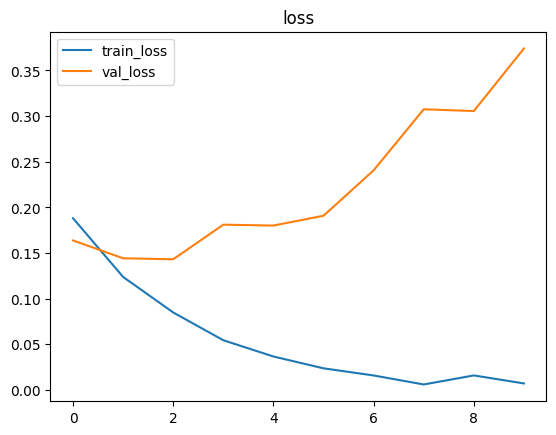

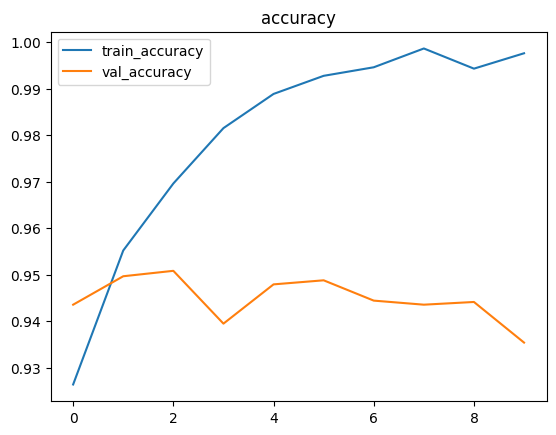

In [13]:
plot_history(two_classes_model_history)

In [14]:
two_classes_model.save("two_classes_model")

INFO:tensorflow:Assets written to: two_classes_model\assets


INFO:tensorflow:Assets written to: two_classes_model\assets


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Load and preprocess an image for inference
img_path = './valid5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)

# Normalize the pixel values to the range [0, 1]
img = img / 255.0

# Expand dimensions to match batch size (1 in this case)
img = np.expand_dims(img, axis=0)


In [26]:
class_labels=["motorcycle", "car"]
predictions = two_classes_model.predict(img)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]
print("Predicted class:", predicted_class)
# Multiply each probability by 100 to convert to percentage
predictions_in_percentage = [probability * 100 for probability in predictions[0]]

print(predictions_in_percentage)



1/1 [==============================] - 0s 22ms/step
Predicted class: car
[1.7316906797404386e-07, 100.0]


array([9.0754364e-04, 9.9909246e-01, 5.5787208e-08], dtype=float32)

[0.09075436391867697, 99.90924596786499, 5.578720774224166e-06]


In [131]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar100

In [134]:
base_model = ResNet50(weights='imagenet', include_top=False)

num_classes = 3

# Add your custom top classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [140]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=5,
                                            steps_per_epoch=len(train_data), 
                                            validation_data=test_data, 
                                            validation_steps=len(test_data))




Epoch 1/5
  5/703 [..............................] - ETA: 1:41:41 - loss: 0.1768 - accuracy: 0.9438

KeyboardInterrupt: 